In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MyLinearRegression import MyLinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
# https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris
data = pd.read_csv('./data/penguins.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


The dataset consists of 7 columns.

    species: penguin species (Chinstrap, Adélie, or Gentoo)
    culmen_length_mm: culmen length (mm)
    culmen_depth_mm: culmen depth (mm)
    flipper_length_mm: flipper length (mm)
    body_mass_g: body mass (g)
    island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    sex: penguin sex



#### Task 1. Create Linear regression class, fit-predict model and assert it with sklearn LinearRegression
(+) class MyLinearRegression created

### Test 1 (binary case)

In [9]:
X = data[['flipper_length_mm']]
y = data['culmen_length_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

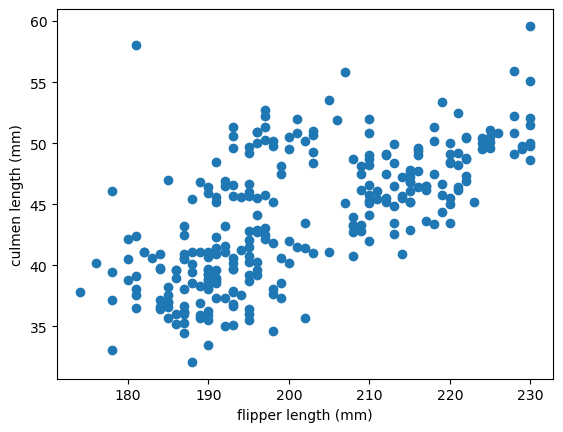

In [11]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('flipper length (mm)');
plt.ylabel('culmen length (mm)');

plt.show()

In [12]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_

(array([0.25252708]), -6.8985154504680395)

c:\Users\iteti\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\iteti\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


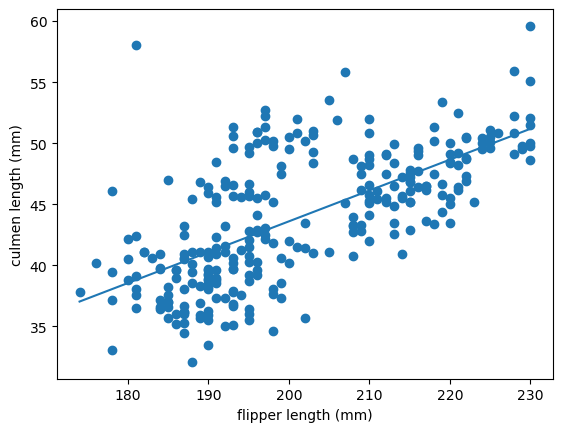

In [13]:
# visualise
plt.scatter(X_train, y_train)

# linear regression line
# y = coef_*x_1 + intercept_
def f_line(x):
    return  my_lr.coef_*x + my_lr.intercept_

x = [np.min(X_train), np.max(X_train)]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('flipper length (mm)');
plt.ylabel('culmen length (mm)');

plt.show();

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

(array([0.25252708]), -6.898515450473397)

In [15]:
assert np.allclose(my_lr.coef_, lr.coef_), "Error: coef_ in your model differs from coef_ in sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Error: coef_ in your model differs from coef_ in sklearn!"

In [16]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Error: predict outputs wrong results!"

### Test 2 (multiple case)

In [17]:
y = data['culmen_length_mm']
X = data.drop(columns=['culmen_length_mm'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
print(my_lr.coef_, my_lr.intercept_)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)

[ 8.18664448e+00  6.28661269e-01  1.43570787e+00 -1.29020629e-02
 -1.17017423e-03  2.38238323e+00] 17.762577307403262
[ 8.18664448e+00  6.28661269e-01  1.43570787e+00 -1.29020629e-02
 -1.17017423e-03  2.38238323e+00] 17.7625773074165


In [18]:
assert np.allclose(my_lr.coef_, lr.coef_), "Error: coef_ in your model differs from coef_ in sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Error: coef_ in your model differs from coef_ in sklearn!"

In [19]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Error: predict outputs wrong results!"